In [1]:
from lib.MLP import *
from lib.graph import draw_dot
from lib.graph import draw_mlp

In [2]:
#fitur, 3 input, 4 batch size
xs = [
    [10.0,-1.0,1.0],
    [-1.0,0.5,1.0],
    [1.0,1.0,1.0],
    [1.0,-1.0,1.0]
]


#label
ys = [
    [2.0, -1.0],
    [-1.0, 1.0,],
    [-1.0, 1.0],
    [1.0, -1.0],
]  
input_layer = 3
layer_f_activations = [
  [5,'linear'],
  [5,'tanh'],
  [5,'relu'],
  [2,'linear'] 
]
weight = Weight("uniform", 42, input_layer, lower=-1, upper=1)

n = MLP(input_layer,[n[0] for n in layer_f_activations],activations=[n[1] for n in layer_f_activations],weight=weight)
for i in range(100): #50 epoch
  #Forward
  ypred = [n(x) for x in xs]
  # Sum rumus MSE
  # Todo, Loss function yg lain
  loss = sum([sum((yout_i - ygt_i)**2 for ygt_i, yout_i in zip(ygt, yout)) for ygt, yout in zip(ys, ypred)])

  #flush bobot w
  n.zero_grad()

  ##Backward
  loss.backward()
  learning_rate =0.01


  #gradient descent
  for p in n.parameters():
    #W + -lr*deltaW
    p.data += -1 *learning_rate * p.grad
  if(i%10==0):
    print(i,"Lost Func (MSE) " ,loss.data)

for x in ypred:
  print(x)



sz:  [3, 5, 5, 5, 2]
0 Lost Func (MSE)  31.39056213268899
10 Lost Func (MSE)  9.253635553887243
20 Lost Func (MSE)  2.2956624238841865
30 Lost Func (MSE)  0.1380014532846866
40 Lost Func (MSE)  0.08903194449216431
50 Lost Func (MSE)  0.07059295511949938
60 Lost Func (MSE)  0.059028610342408035
70 Lost Func (MSE)  0.051038197976482125
80 Lost Func (MSE)  0.04497718260264025
90 Lost Func (MSE)  0.04016801977404194
[Value(data=1.951463916291363, grad=-0.09707216741727409), Value(data=-0.9531605420092377, grad=0.09367891598152456)]
[Value(data=-1.1014102878510519, grad=-0.20282057570210377), Value(data=1.0770439920895234, grad=0.1540879841790468)]
[Value(data=-0.9110489717077395, grad=0.17790205658452107), Value(data=0.9318352802199972, grad=-0.13632943956000565)]
[Value(data=1.0391009381194318, grad=0.07820187623886365), Value(data=-1.04127152874163, grad=-0.08254305748326018)]


In [6]:
n.show_W_distribution()


=== Layer 1 ===
  W di Neuron H1: W1=0.1991 | W2=-1.0674 | W3=-0.5439
  W di Neuron H2: W1=-0.3700 | W2=0.6500 | W3=0.5313
  W di Neuron H3: W1=0.6438 | W2=-0.8865 | W3=-0.2931
  W di Neuron H4: W1=-0.9404 | W2=-0.5627 | W3=0.0107
  W di Neuron H5: W1=-0.9469 | W2=-0.6023 | W3=0.2998
  Wb: 0.9060

=== Layer 2 ===
  W di Neuron H1: W1=0.0751 | W2=-0.4957 | W3=0.1720
  W di Neuron H2: W1=0.6634 | W2=-1.2827 | W3=0.4852
  W di Neuron H3: W1=0.4652 | W2=-0.2657 | W3=-0.5746
  W di Neuron H4: W1=0.9144 | W2=-0.3268 | W3=-0.8145
  W di Neuron H5: W1=-0.8066 | W2=0.6950 | W3=0.2075
  Wb: 1.0335

=== Layer 3 ===
  W di Neuron H1: W1=0.5951 | W2=0.6437 | W3=-0.0467
  W di Neuron H2: W1=0.6046 | W2=-0.9696 | W3=0.6298
  W di Neuron H3: W1=0.7273 | W2=0.5026 | W3=0.5973
  W di Neuron H4: W1=0.1547 | W2=0.4091 | W3=-0.9084
  W di Neuron H5: W1=-0.5442 | W2=-0.4212 | W3=-0.8404
  Wb: 0.8910

=== Layer 4 ===
  W di Neuron H1: W1=0.4417 | W2=-1.1119 | W3=-0.0857
  W di Neuron H2: W1=-0.4781 | W2=0.2

In [7]:
n.show_grad_distribution()


=== Layer 1 ===
  ΔW di Neuron H1: ΔW1=-0.0020 | ΔW2=-0.0110 | ΔW3=0.0063
  ΔW di Neuron H2: ΔW1=-0.0332 | ΔW2=-0.0037 | ΔW3=-0.0357
  ΔW di Neuron H3: ΔW1=0.0580 | ΔW2=0.0306 | ΔW3=0.0370
  ΔW di Neuron H4: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔW di Neuron H5: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔWb: 0.0063

=== Layer 2 ===
  ΔW di Neuron H1: ΔW1=0.0052 | ΔW2=0.0084 | ΔW3=-0.0019
  ΔW di Neuron H2: ΔW1=0.0060 | ΔW2=0.0497 | ΔW3=0.0360
  ΔW di Neuron H3: ΔW1=0.0200 | ΔW2=-0.0628 | ΔW3=-0.0249
  ΔW di Neuron H4: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔW di Neuron H5: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔWb: 0.0040

=== Layer 3 ===
  ΔW di Neuron H1: ΔW1=0.0268 | ΔW2=0.0082 | ΔW3=0.0365
  ΔW di Neuron H2: ΔW1=-0.0427 | ΔW2=-0.0122 | ΔW3=-0.0433
  ΔW di Neuron H3: ΔW1=0.0106 | ΔW2=0.0038 | ΔW3=0.0238
  ΔW di Neuron H4: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔW di Neuron H5: ΔW1=0.0000 | ΔW2=0.0000 | ΔW3=0.0000
  ΔWb: -0.0331

=== Layer 4 ===
  ΔW di Neuron H1: ΔW1=-0.0142 | ΔW2=-

In [ ]:
for i in range(0,len(n.layers)):
  n.plot_W_distribution(i)

In [ ]:
for i in range(0,len(n.layers)):
  n.plot_grad_distribution(i)

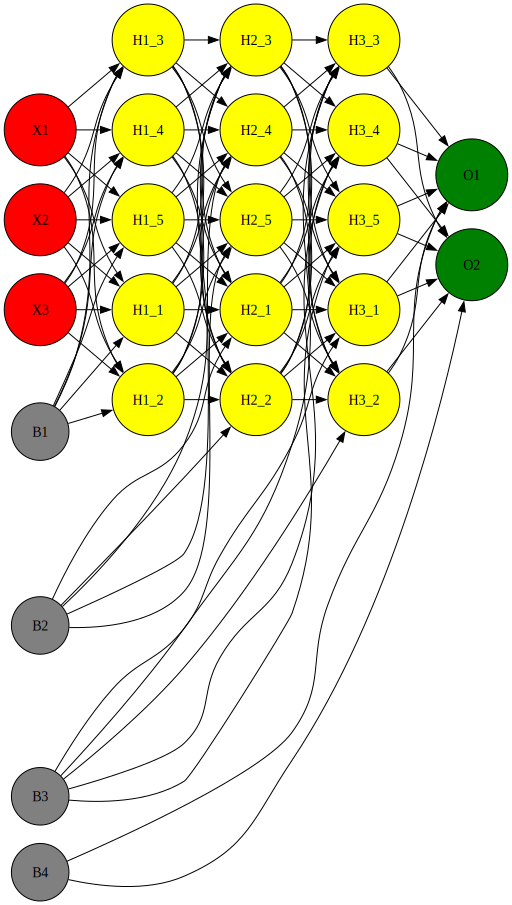

In [3]:
draw_mlp(n)

In [4]:
draw_dot(loss).render("graph_output.dot",view = True)

'graph_output.dot.svg'

In [5]:
draw_mlp(n).render("mlp.dot",view= True)


'mlp.dot.svg'